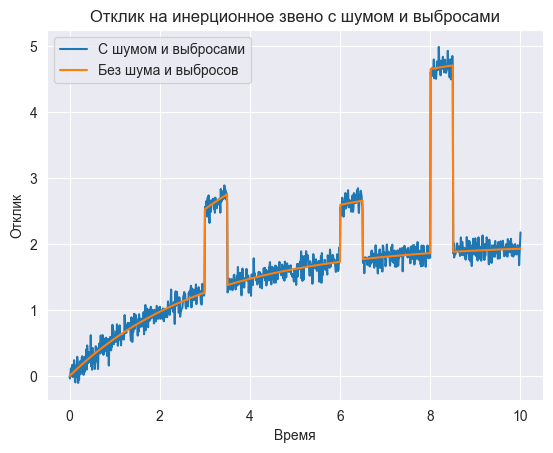

In [11]:
import control as ctrl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Параметры инерционного звена
K = 2.0  # коэффициент усиления
T = 3.0  # постоянная времени

# Передаточная функция инерционного звена
numerator = [K]
denominator = [T, 1]
system = ctrl.TransferFunction(numerator, denominator)

# Временные точки
time_points = np.linspace(0, 10, 1000)

# Генерация временного ряда
time, response = ctrl.step_response(system, time_points)

# Генерация шума
noise = np.random.normal(0, 0.1, size=len(time_points))  # среднее = 0, стандартное отклонение = 0.1

# Создание продолжительных выбросов
outliers_start = [300, 600, 800]
outliers_end = [350, 650, 850]
outlier_factor = [2.0, 1.5, 2.5]

for start, end, factor in zip(outliers_start, outliers_end, outlier_factor):
    response[start:end] *= factor

# Добавление шума и выбросов к отклику
response_with_noise_and_outliers = response + noise

# Визуализация временного ряда с шумом и выбросами
plt.plot(time, response_with_noise_and_outliers, label='С шумом и выбросами')
plt.plot(time, response, label='Без шума и выбросов')
plt.title('Отклик на инерционное звено с шумом и выбросами')
plt.xlabel('Время')
plt.ylabel('Отклик')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
df_time = pd.DataFrame(time)
df_response = pd.DataFrame(response)
df_some = pd.concat([df_time, df_response], axis=1)
df_response

,0
0,0.000000
1,0.006662
2,0.013302
3,0.019920
4,0.026516
...,...
995,1.927693
996,1.927934
997,1.928174
998,1.928414


In [5]:
df_time = pd.DataFrame(response)
df_time.count()

0    1000
dtype: int64

<Axes: >

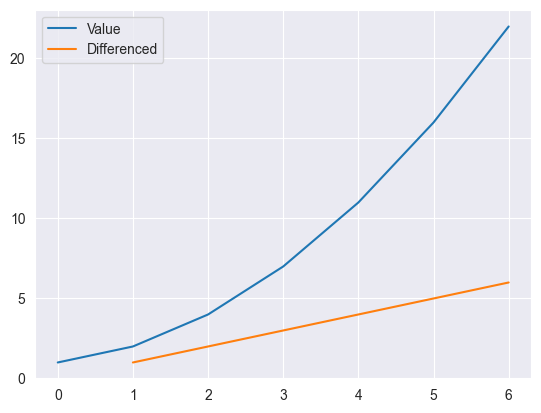

In [13]:
# Создание временного ряда
data = {'Value': [1, 2, 4, 7, 11, 16, 22]}
df = pd.DataFrame(data)

# Дифференцирование временного ряда
df['Differenced'] = df['Value'].diff()

# Визуализация результатов
df.plot()